<a href="https://colab.research.google.com/github/yleessam/tf/blob/main/mnist_tensorflow_1_%EB%B0%B0%ED%8F%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1.MNIST 분류

### 1-1. 환경 구성: import


In [1]:
import tensorflow as tf    # tensorflow의 별명은 tf로 한다
from tensorflow import keras

print(tf.__version__)      # version 앞뒤로 두 개의 밑줄

2.15.0


In [2]:
import numpy as np
import matplotlib.pyplot as plt

### 1-2. MNIST 데이터 가져오기



In [ ]:
# MNIST 데이터를 학습용, 테스트 데이터로 구분하여 읽어옴

(X_train, y_train), (X_test, y_test) =

11490434/11490434 [==============================] - 0s 0us/step


### 1-3. 데이터 살펴보기

In [ ]:
print('X_train.shape =', , 'y_train.shape =', )
print('X_test.shape  =', , 'y_test.shape  =', )

X_train.shape = (60000, 28, 28) y_train.shape = (60000,)
X_test.shape  = (10000, 28, 28) y_test.shape  = (10000,)


In [ ]:
num = X_train[0]


   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0
   0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0
   0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0
   0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   0   0   0   0

 MNIST 데이터를 이미지로 살펴보기

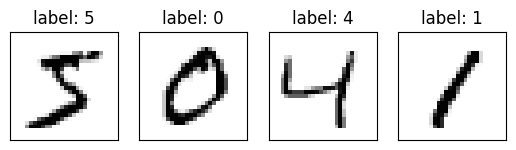

### 1-4. 데이터 전처리

In [ ]:
#입력값 전처리 : 0에서 1사이의 값으로 입력 데이터를 가공함-정규화

X_train, X_test =

### 1-5. 심층 신경망 모델 만들기

#### (1) 모델 구성: Sequential(), Flatten(), Dense() ...

In [ ]:
model = keras.Sequential([

])

#### (2) 모델 요약 보기: summary()

> - 입력층 노드: 28*28 = 784
> - 입력층-은닉층 연결: 784*256+256(편향)) = 200,960
> - 은닉층-출력층 연결: (256+1) * 10 = 2,570
> - 전체 파라미터 개수: 200,960 + 2,570 = 203,530

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203530 (795.04 KB)
Trainable params: 203530 (795.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### (3) 학습 과정 설정: compile()


#### (4) 모델 학습: fit()

In [ ]:
# https://keras.io/api/models/model_training_apis/
# batch_size를 입력하지 않으면 기본값은 32이다. 60000/32=1875

history =

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2252 - acc: 0.9346
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0938 - acc: 0.9717
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0627 - acc: 0.9811
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0459 - acc: 0.9857
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0328 - acc: 0.9896


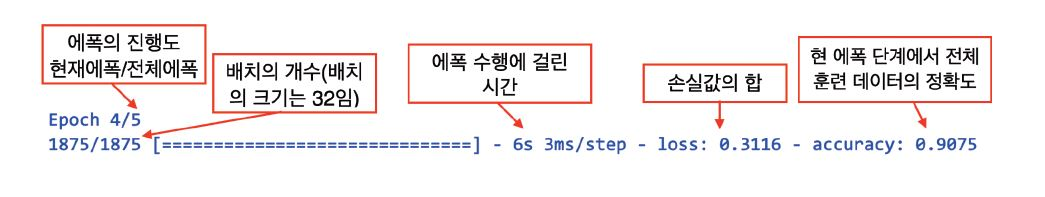

#### (5) 모델 평가: evaluate()

In [ ]:
test_loss, test_acc =

print('\n테스트 정확도:', test_acc)

313/313 - 0s - loss: 0.2678 - acc: 0.9231 - 483ms/epoch - 2ms/step

테스트 정확도: 0.9230999946594238


신경망의 학습 데이터는 동일하지만 학습 때 사용되는 모델의 초기 가중치는 매번 랜덤하게 결정되므로 동일한 모델을 만들더라도 매번 정확도 값이 다르게 나타날 수 있음.

#### (6) 학습과정 살펴보기: 시각화

dict_keys(['loss', 'acc'])
dict_items([('loss', [0.22518771886825562, 0.09380805492401123, 0.06266109645366669, 0.0458679124712944, 0.032804083079099655]), ('acc', [0.934583306312561, 0.971666693687439, 0.981083333492279, 0.9857000112533569, 0.9895666837692261])])


#### * 결과 시각화 함수:draw_acc_loss()

In [ ]:
import matplotlib.pyplot as plt

def draw_acc_loss(his_dict):


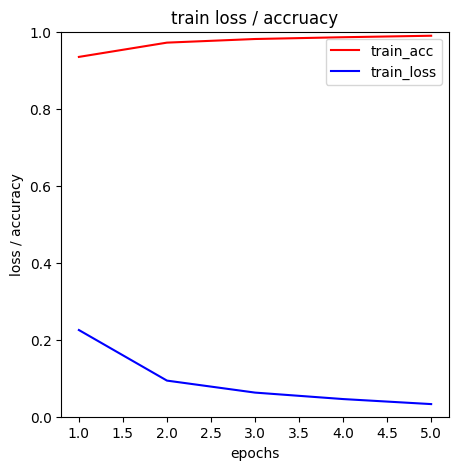

In [ ]:
draw_acc_loss()

### 1-6. 인공 신경망의 성능 개선

인공 신경망의 성능을 조금 더 개선하는 방법

1. 데이터를 더 많이 사용하기
2. 모델을 바꾸기 (학습을 위한 은닉층을 더 깊게 만들기, 노드의 개수 늘리기)
3. 하이퍼파라미터(epoch, batch_size 등) 튜닝하기 등의 방법이 있을 수 있다.

#### (1) 은닉층 추가 I

In [ ]:
# 은닉층 추가
#    keras.layers.Dense(128, activation='relu'),
#    keras.layers.Dense(64, activation='relu'),
#    2의 배수

model_3 = keras.Sequential([

])



In [ ]:
# 모델 요약하기


In [ ]:
#모델 설정

#모델 학습

#모델 평가


Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.7025 - acc: 0.7737
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3565 - acc: 0.8931
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2645 - acc: 0.9209
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2001 - acc: 0.9395
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1620 - acc: 0.9508

테스트 정확도: 0.9495000243186951


#### (2) 은닉층 추가 II

In [ ]:
# 은닉층 추가
#    keras.layers.Dense(1256, activation='relu'),
#    keras.layers.Dense(512, activation='relu'),

model_5 = keras.Sequential([

])

model_5.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 1256)              985960    
                                                                 
 dense_7 (Dense)             (None, 512)               643584    
                                                                 
 dense_8 (Dense)             (None, 256)               131328    
                                                                 
 dense_9 (Dense)             (None, 128)               32896     
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dense_11 (Dense)            (None, 10)               

In [ ]:
#모델 설정

#모델 학습

#모델 평가


Epoch 1/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2205 - acc: 0.9341
Epoch 2/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1048 - acc: 0.9703
Epoch 3/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0806 - acc: 0.9780
Epoch 4/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0596 - acc: 0.9834
Epoch 5/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0478 - acc: 0.9868

테스트 정확도: 0.9736999869346619


#### (3) 각 layer의 노드의 수 조절

In [ ]:
# 각자 해보기

#### (4) 하이퍼파라미터 조절

epochs, batch_size, optimizer 등을 조정하며 테스트 해볼 수 있다

In [ ]:
# 각자 해보기

# 하지만 이 데이터의 경우 원래의 정확도가 높아서 더 높이려고 애쓸 필요가 없다..................

#### (5) 검증 데이터셋으로 검증하기

만일 원래의 train set을 train set과 validation set으로 나누어 검증하며 학습하면 성능이 더 좋아질까?

새로운 데이터 구성
- X_train (60,000개, train 데이터) = XX_train(48,000개, train 데이터) + XX_test(12,000개, validation 데이터)
- X_test (10,000개, test 데이터)

- y_train (60,000개, train 데이터) = yy_train(48,000개, train 데이터) + yy_test(12,000개, validation 데이터)
- y_test (10,000개, test 데이터)

In [ ]:
from sklearn.model_selection import train_test_split

# 훈련 데이터를 7:3의 비율로 분리해서 훈련데이터와 검증데이터를 만든다
XX_train, XX_val, yy_train, yy_val =
# random_state = 777 seed같은 역할 숫자는 아무거나 괜찮음
print(f'훈련 데이터:{}, 레이블:{}')
print(f'검증 데이터:{}, 레이블:{}')

훈련 데이터:(42000, 28, 28), 레이블:(42000,)
검증 데이터:(18000, 28, 28), 레이블:(18000,)


가장 초기에 구성한 모델을 그대로 사용해서 학습을 시킨다

In [ ]:
history =


Epoch 1/5
1313/1313 [==============================] - 7s 5ms/step - loss: 0.2719 - acc: 0.9216 - val_loss: 0.2622 - val_acc: 0.9232
Epoch 2/5
1313/1313 [==============================] - 7s 5ms/step - loss: 0.2596 - acc: 0.9249 - val_loss: 0.2562 - val_acc: 0.9273
Epoch 3/5
1313/1313 [==============================] - 6s 5ms/step - loss: 0.2485 - acc: 0.9290 - val_loss: 0.2441 - val_acc: 0.9276
Epoch 4/5
1313/1313 [==============================] - 7s 5ms/step - loss: 0.2381 - acc: 0.9316 - val_loss: 0.2372 - val_acc: 0.9322
Epoch 5/5
1313/1313 [==============================] - 7s 5ms/step - loss: 0.2275 - acc: 0.9356 - val_loss: 0.2262 - val_acc: 0.9354


학습 결과를 그려보자

In [ ]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

#### * 결과 시각화 함수:draw_acc_loss_val()

In [ ]:
import matplotlib.pyplot as plt

def draw_acc_loss_val(his_dict):



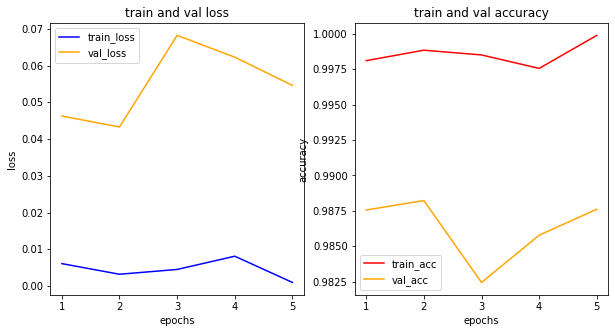

In [ ]:
draw_acc_loss_val()

초기의 모델에서 epochs 수만 늘려서 학습시켜 보자: fit()

In [ ]:
history =

Epoch 1/50
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0060 - acc: 0.9980 - val_loss: 0.0102 - val_acc: 0.9964
Epoch 2/50
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0019 - acc: 0.9994 - val_loss: 0.0116 - val_acc: 0.9960
Epoch 3/50
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0033 - acc: 0.9990 - val_loss: 0.0247 - val_acc: 0.9919
Epoch 4/50
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0048 - acc: 0.9983 - val_loss: 0.0101 - val_acc: 0.9967
Epoch 5/50
1313/1313 [==============================] - 5s 4ms/step - loss: 3.2797e-04 - acc: 1.0000 - val_loss: 0.0107 - val_acc: 0.9966
Epoch 6/50
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0091 - acc: 0.9972 - val_loss: 0.0164 - val_acc: 0.9947
Epoch 7/50
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0011 - acc: 0.9997 - val_loss: 0.0186 - val_acc: 0.9937
Epoch 8/50
1313/1313 [==============================] - 5s

In [ ]:
test_loss, test_acc =
print('\n테스트 정확도:', test_acc)


테스트 정확도: 0.9366999864578247


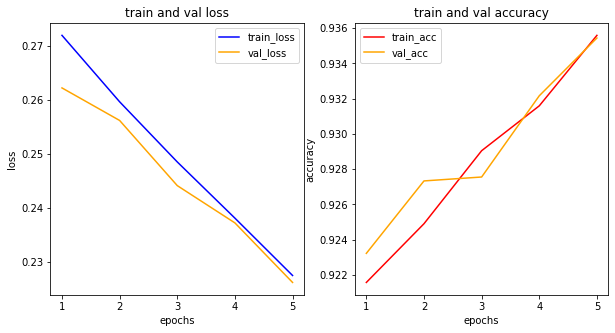

In [ ]:
draw_acc_loss_val()

### 1-7. 새로운 이미지로 테스트

In [ ]:
X_test.shape

(10000, 28, 28)

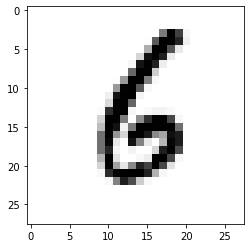

In [ ]:
randIdx =    # 10,000개의 테스트 이미지 중 하나를 선택
plt.imshow()

In [ ]:
# 2차원 데이터를 3차원으로 수정 필요 error 발생
y_hat =

In [ ]:
# 각각의 레이블과 일치하는 정도를 0에서 1 사이의 확률값으로 출력
# 2차원 데이터를 3차원으로 수정 필요
y_hat =
print(y_hat)
print("손글씨 판정: ", )

[[1.5661410e-04 7.8914363e-06 9.9851249e-04 2.1486232e-04 4.4300081e-04
  4.5098430e-03 9.9316144e-01 7.8407773e-08 4.8629346e-04 2.1400514e-05]]
손글씨 판정:  6


### 1-8. 본인의 손글씨로 테스트 하기

#### (1) 손글씨파일 업로드

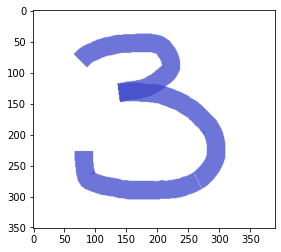

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

img = mpimg.imread()
plt.imshow(img, cmap='Greys')

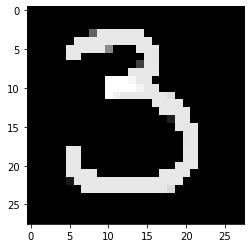

In [ ]:
# 이미지의 사이즈를 28X28로 맞춰주기 위해서 사용함
import cv2
img = cv2.imread()
img = cv2.resize( )
plt.imshow()

#### (2) 분류예측 실행

In [ ]:
y_hat =
print(y_hat)
print("손글씨 판정: ", )

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
손글씨 판정:  3


#### !! 데이터의 전처리는 매우 중요하다

In [ ]:
for i in range(28):
    for j in range(28):

    print()

 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 208 131 131 131 131 131 131 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 131 131 131 131 131 131 131 131 131 131 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 131 131 131 131 131 186 255 255 255 131 131 131 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 131 131 255 255 255 255 255 255 255 255 131 132 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 225 131 131 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 131 131 131 131 255 255 255 255 255 255 255

In [ ]:
# 이미지의 색상을 반전시키고 0에서 1사이의 실수로 만들자
img =

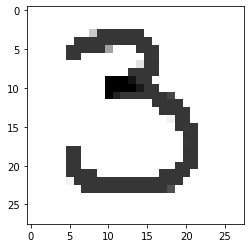

In [ ]:
plt.imshow(img, cmap='Greys')

#### (3) 전처리 후 분류예측 실행

In [ ]:
y_hat =
print(y_hat)
print("손글씨 판정: ",)

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
손글씨 판정:  3
